# Testing Functional Connectivities
This script is for me to experiment/test generating functional connectivities from the data.

In [1]:
from nilearn import plotting, image
from os import listdir
from os.path import isfile, join
import numpy as np

In [14]:
subject_path = '/imaging3/owenlab/wilson/MovieData/Release8/Age10/BioBank_Analysis_All/aamod_smooth_00001/sub-NDARAP912JK3'

files = [join(subject_path, f) for f in listdir(subject_path) if isfile(join(subject_path, f))]
print(files[1])

/imaging3/owenlab/wilson/MovieData/Release8/Age10/BioBank_Analysis_All/aamod_smooth_00001/sub-NDARAP912JK3/wrsub-NDARAP912JK3_task-movieDM_bold_0635.nii


In [15]:
concat_file = image.concat_imgs(files[1])

In [16]:
selected_volumes = image.index_img(concat_file, slice(3, 5))

for img in image.iter_img(selected_volumes):
    plotting.view_img(img)

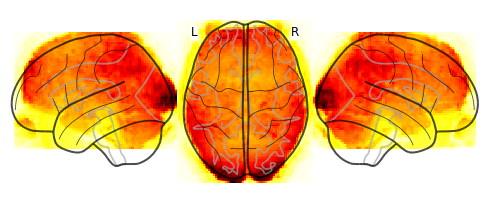

In [17]:
plotting.plot_glass_brain(image.mean_img(concat_file), threshold=None, display_mode='lzr')

In [9]:
from nilearn import datasets

dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = dataset.labels

print('Atlas ROIs are located in nifti image (4D) at: %s' %
      atlas_filename)  # 4D data

{'rois': rec.array([(  1, -25, -98, -12), (  2,  27, -97, -13),
           (  3,  24,  32, -18), (  4, -56, -45, -24),
           (  5,   8,  41, -24), (  6, -21, -22, -20),
           (  7,  17, -28, -17), (  8, -37, -29, -26),
           (  9,  65, -24, -19), ( 10,  52, -34, -27),
           ( 11,  55, -31, -17), ( 12,  34,  38, -12),
           ( 13,  -7, -52,  61), ( 14, -14, -18,  40),
           ( 15,   0, -15,  47), ( 16,  10,  -2,  45),
           ( 17,  -7, -21,  65), ( 18,  -7, -33,  72),
           ( 19,  13, -33,  75), ( 20, -54, -23,  43),
           ( 21,  29, -17,  71), ( 22,  10, -46,  73),
           ( 23, -23, -30,  72), ( 24, -40, -19,  54),
           ( 25,  29, -39,  59), ( 26,  50, -20,  42),
           ( 27, -38, -27,  69), ( 28,  20, -29,  60),
           ( 29,  44,  -8,  57), ( 30, -29, -43,  61),
           ( 31,  10, -17,  74), ( 32,  22, -42,  69),
           ( 33, -45, -32,  47), ( 34, -21, -31,  61),
           ( 35, -13, -17,  75), ( 36,  42, -20,  55),
 

AttributeError: labels

In [4]:
from nilearn import datasets
from nilearn.input_data import NiftiSpheresMasker

power = datasets.fetch_coords_power_2011()
coords = np.vstack((power.rois['x'], power.rois['y'], power.rois['z'])).T

spheres_masker = NiftiSpheresMasker(
    seeds=coords, smoothing_fwhm=6, radius=5.,
    detrend=True, standardize=True, low_pass=0.1, high_pass=0.01, t_r=2)

time_series = spheres_masker.fit_transform(concat_file)
print('Time series has {0} samples'.format(time_series.shape[0]))

time series has 745 samples


In [5]:
from nilearn.input_data import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
                           memory='nilearn_cache', verbose=1)

# Here we go from nifti files to the signal time series in a numpy
# array. Note how we give confounds to be regressed out during signal
# extraction
time_series = masker.fit_transform(concat_file)

NameError: name 'atlas_filename' is not defined

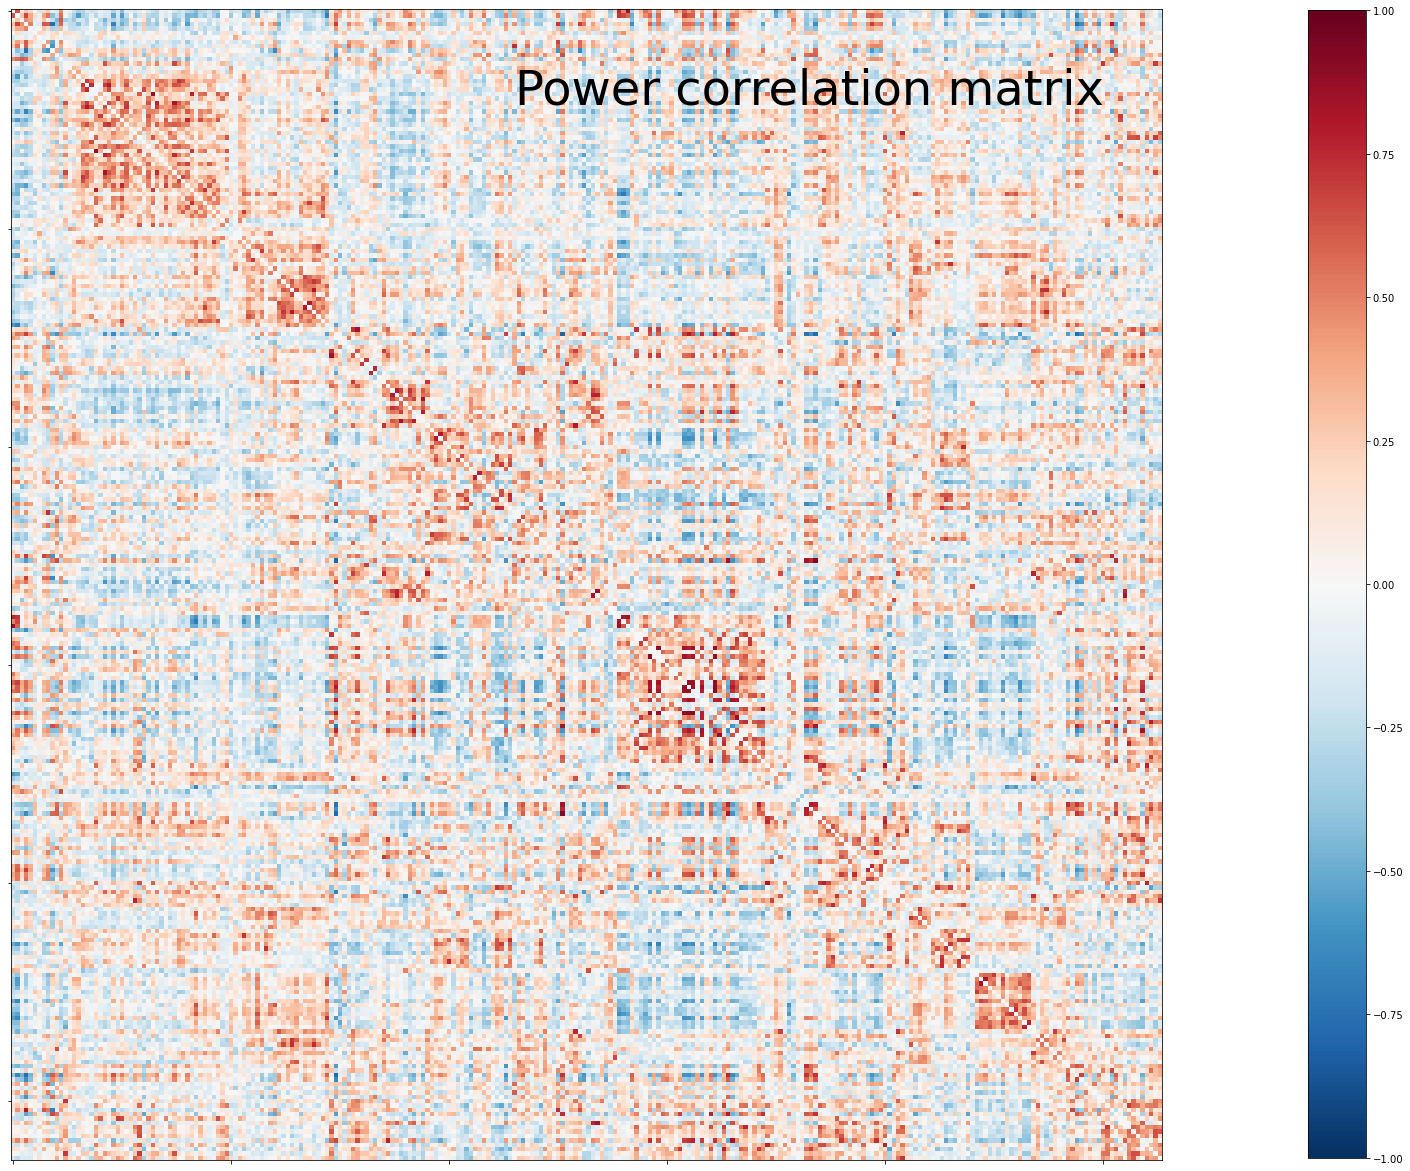

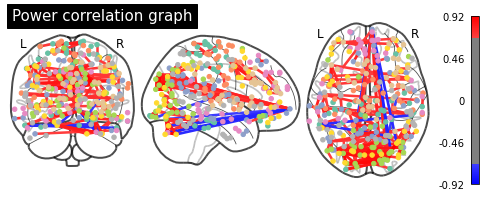

In [9]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Plot the correlation matrix
from nilearn import plotting

# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
# plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels[1:],
#                      vmax=0.8, vmin=-0.8, reorder=True)

plotting.plot_matrix(correlation_matrix, vmin=-1., vmax=1., colorbar=True, figure=(20, 20),
                     title='Power correlation matrix')

# Tweak edge_threshold to keep only the strongest connections.
plotting.plot_connectome(correlation_matrix, coords, title='Power correlation graph',
                         edge_threshold='99.5%', node_size=20, colorbar=True)